In [190]:
import pandas as pd
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import seaborn as sns

Load Dataset:

In [191]:
# fetch dataset
in_vehicle_coupon_recommendation = fetch_ucirepo(id=603)

# data (as pandas dataframes)
X = in_vehicle_coupon_recommendation.data.features
y = in_vehicle_coupon_recommendation.data.targets
X = pd.concat([X,y], axis = 1)   # Merge the two Dataset into one

In [192]:
print(X.head())

       destination  passenger weather  temperature  time  \
0  No Urgent Place      Alone   Sunny           55   2PM   
1  No Urgent Place  Friend(s)   Sunny           80  10AM   
2  No Urgent Place  Friend(s)   Sunny           80  10AM   
3  No Urgent Place  Friend(s)   Sunny           80   2PM   
4  No Urgent Place  Friend(s)   Sunny           80   2PM   

                  coupon expiration  gender age      maritalStatus  \
0        Restaurant(<20)         1d  Female  21  Unmarried partner   
1           Coffee House         2h  Female  21  Unmarried partner   
2  Carry out & Take away         2h  Female  21  Unmarried partner   
3           Coffee House         2h  Female  21  Unmarried partner   
4           Coffee House         1d  Female  21  Unmarried partner   

   has_children                 education  occupation           income  car  \
0             1  Some college - no degree  Unemployed  $37500 - $49999  NaN   
1             1  Some college - no degree  Unemployed  $3750

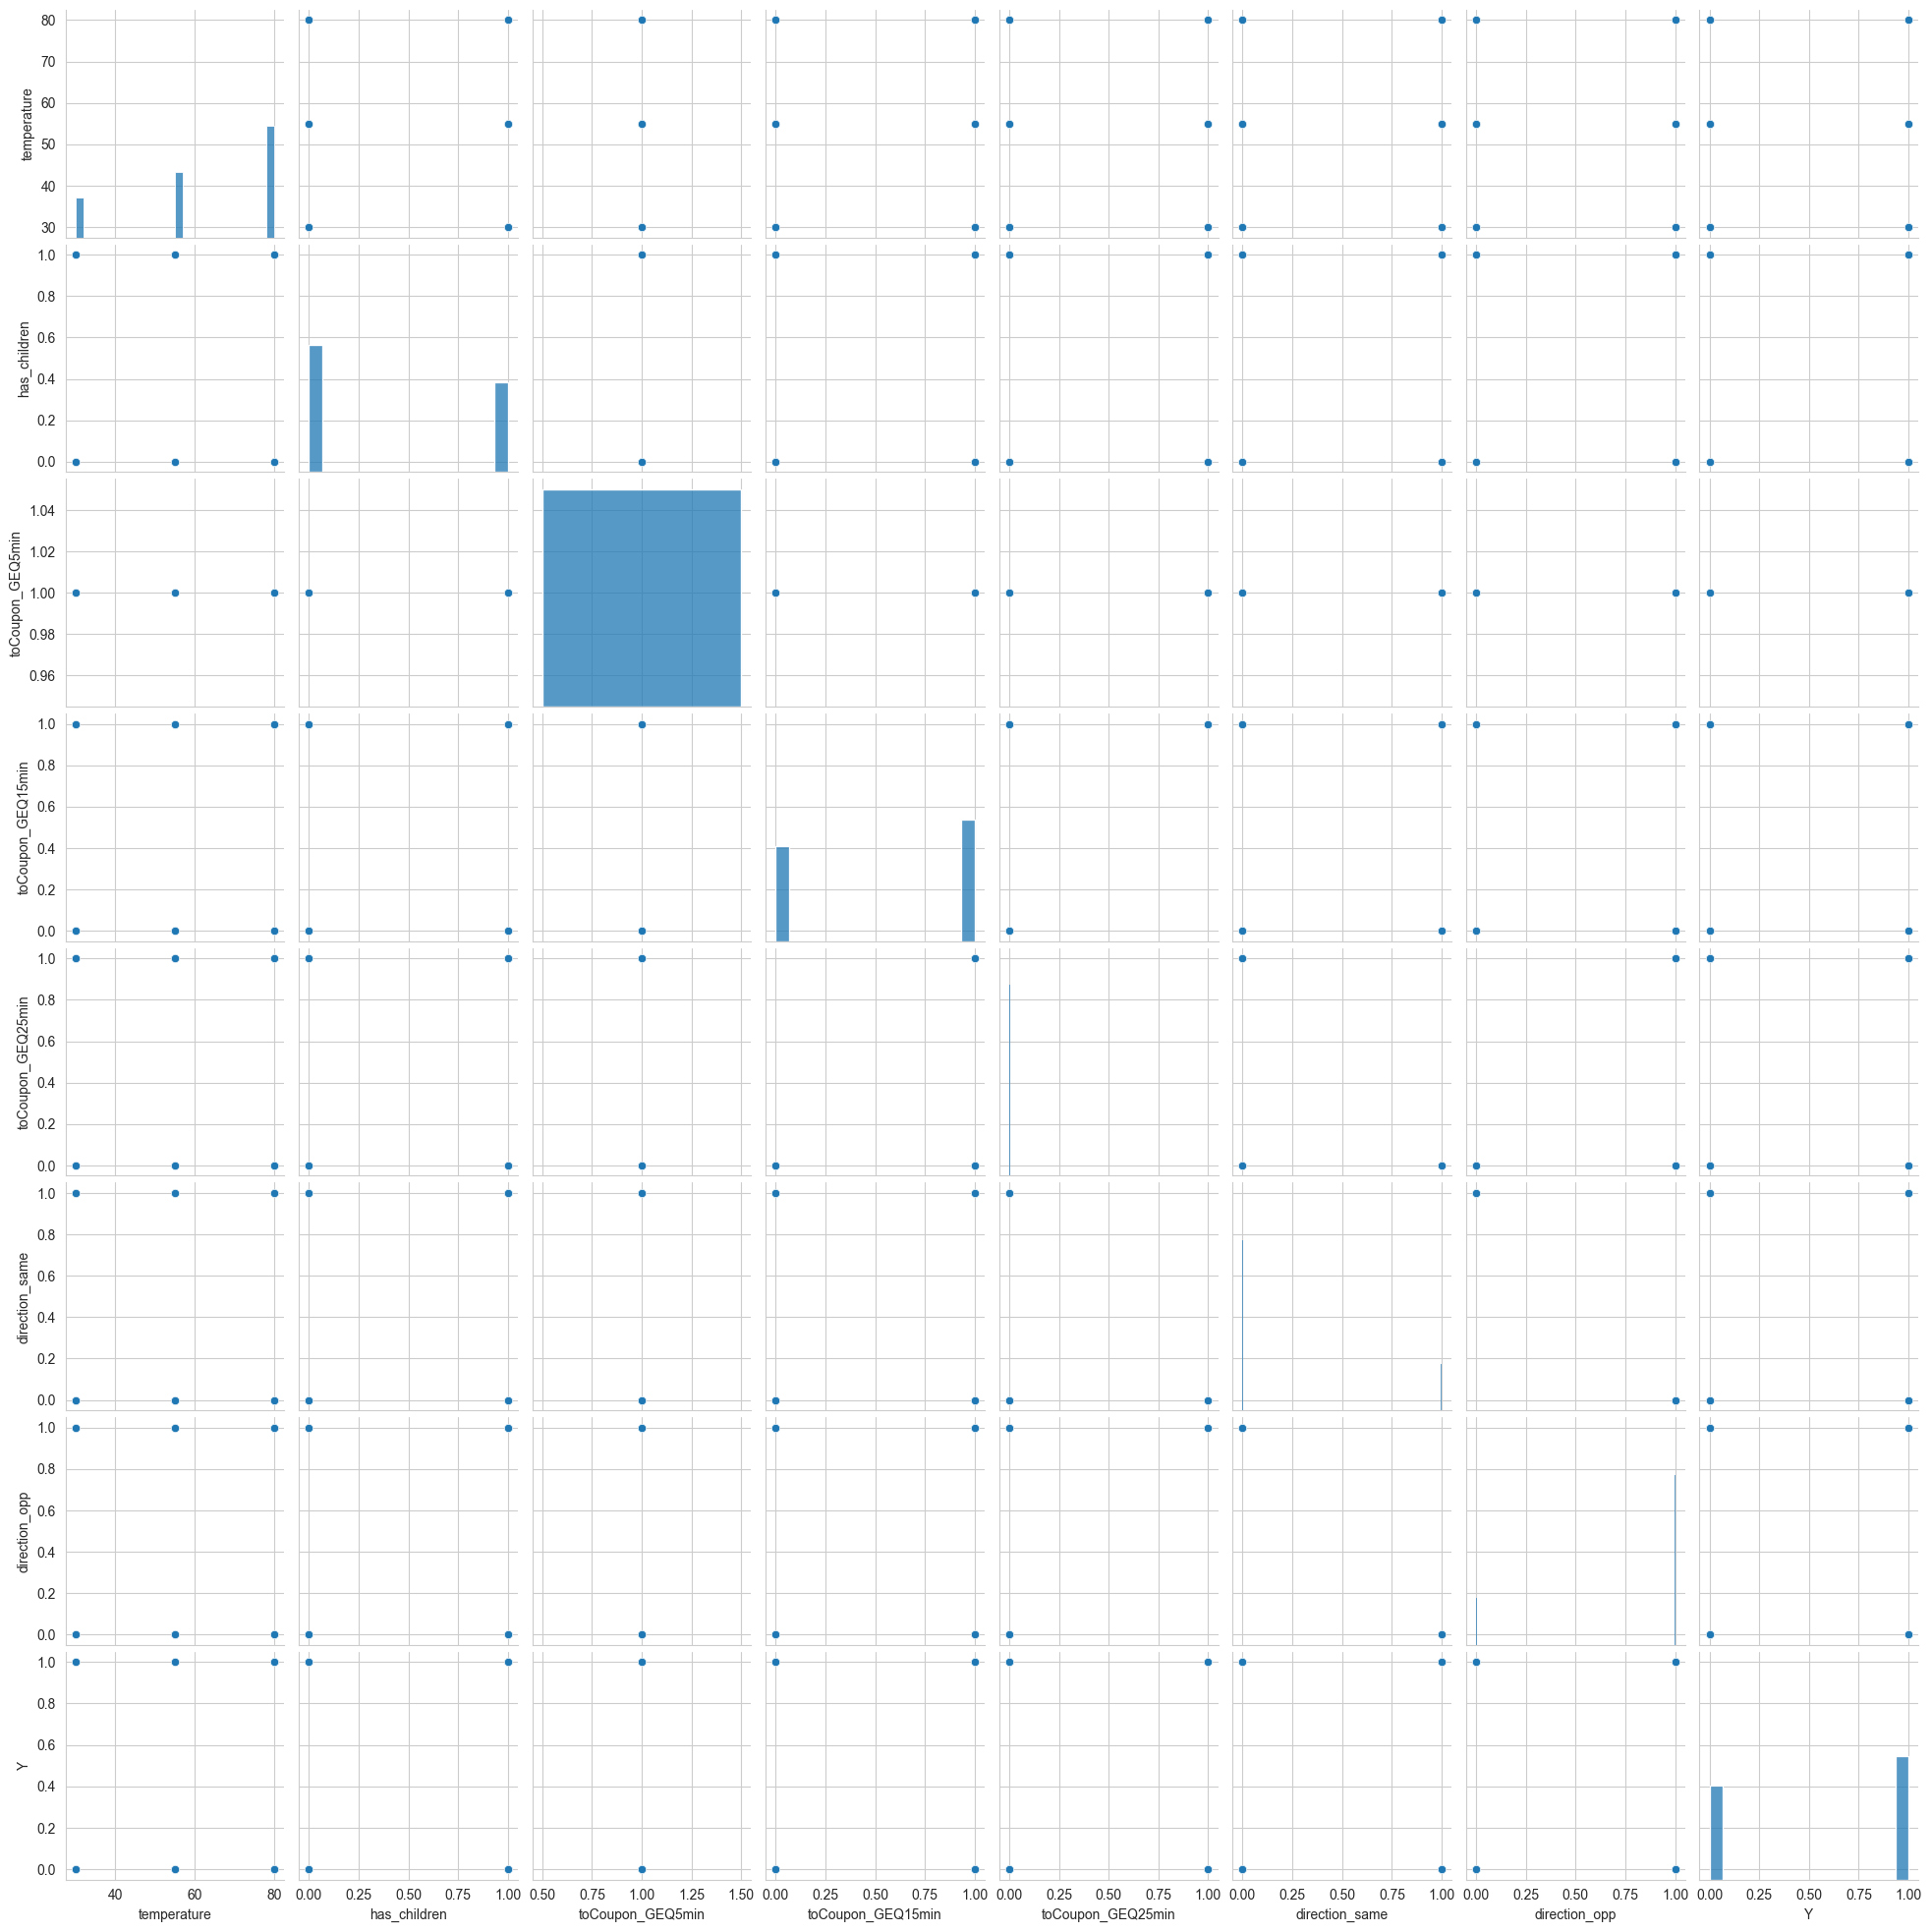

In [169]:
sns.pairplot(X)

In [134]:
X['Y'].value_counts()

Y
1    6877
0    5202
Name: count, dtype: int64

Y                    1.000000
temperature          0.061240
direction_same       0.014570
direction_opp       -0.014570
has_children        -0.045557
toCoupon_GEQ15min   -0.081602
toCoupon_GEQ25min   -0.103633
toCoupon_GEQ5min          NaN
Name: Y, dtype: float64


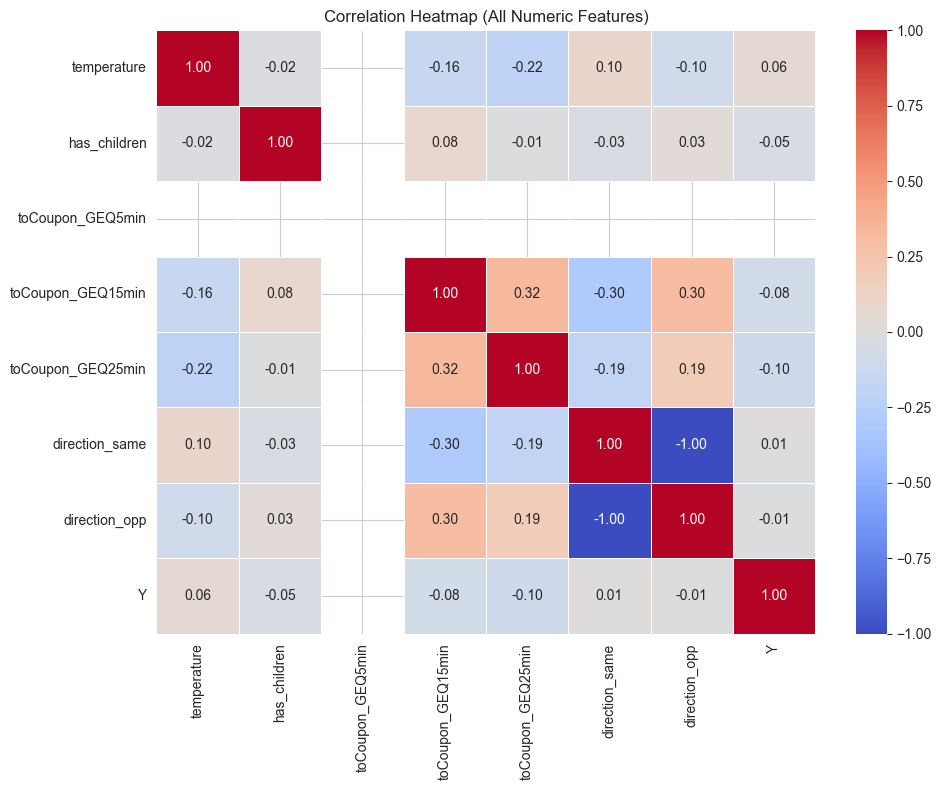

In [188]:
corr_matrix = X.corr(numeric_only='True')  # calculate correlation
target_corr = corr_matrix['Y'].sort_values(ascending=False)

print(target_corr)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap (All Numeric Features)')
plt.tight_layout()
plt.show()



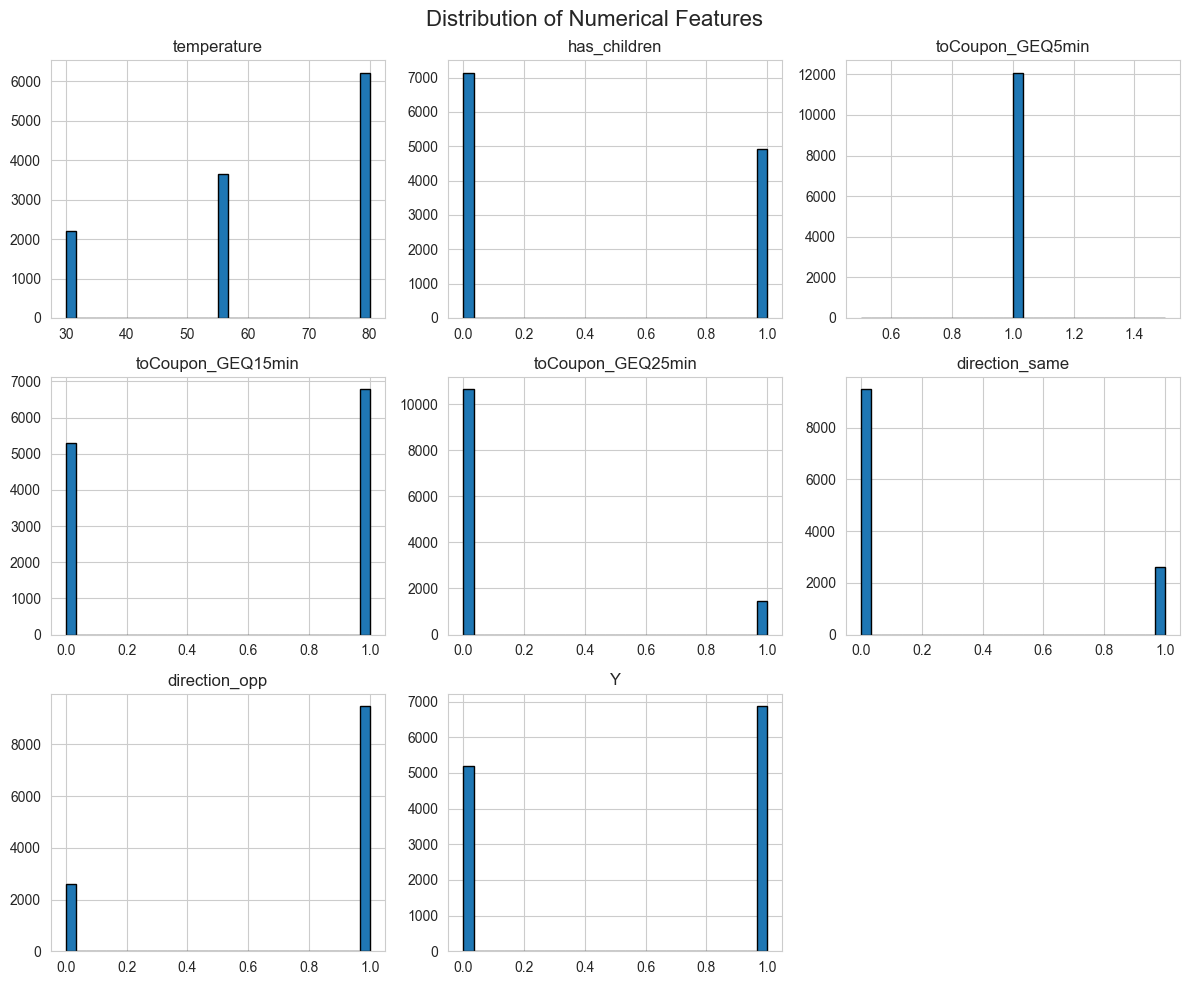

In [140]:
#numeric_cols = X.select_dtypes(include=['number'])

(X.hist(
    bins=30, figsize=(12, 10), edgecolor='black'
))
plt.suptitle('Distribution of Numerical Features', fontsize=16)
plt.tight_layout()
plt.show()

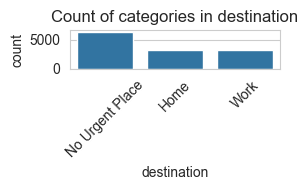

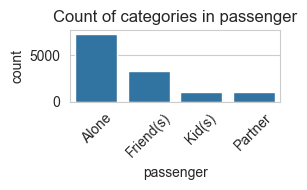

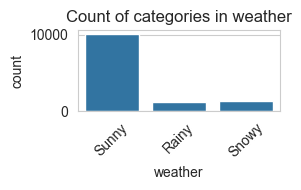

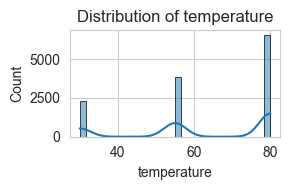

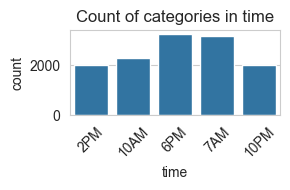

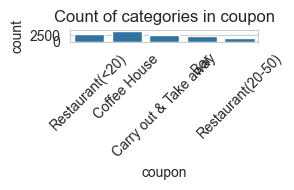

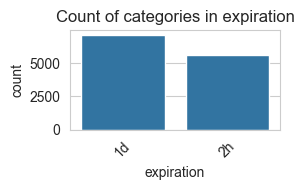

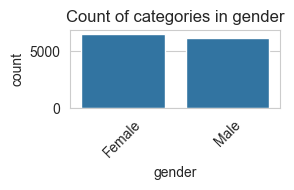

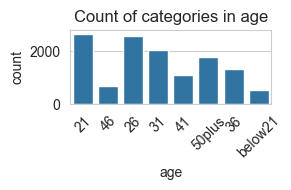

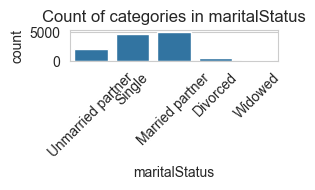

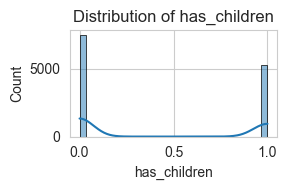

/var/folders/jg/ymy7y6pd27337l_sk7fr_rsr0000gn/T/ipykernel_16217/461056468.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


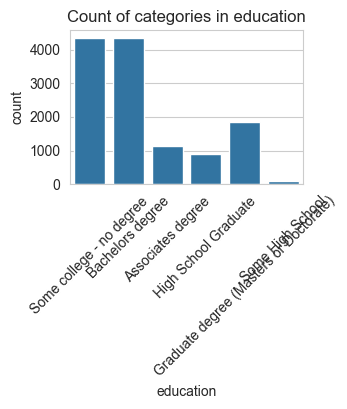

/var/folders/jg/ymy7y6pd27337l_sk7fr_rsr0000gn/T/ipykernel_16217/461056468.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


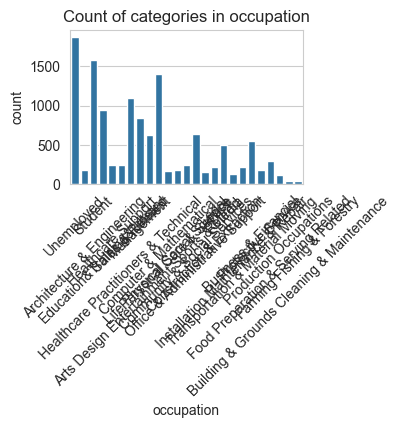

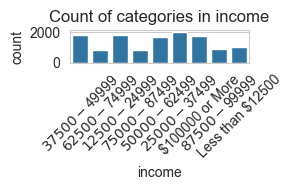

/var/folders/jg/ymy7y6pd27337l_sk7fr_rsr0000gn/T/ipykernel_16217/461056468.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


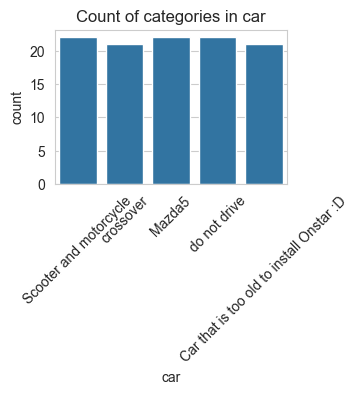

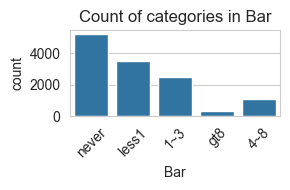

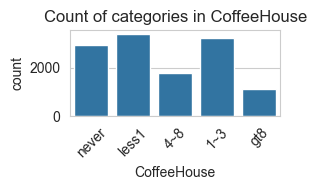

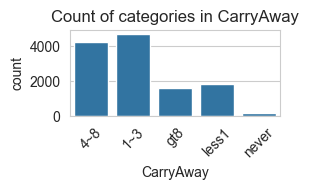

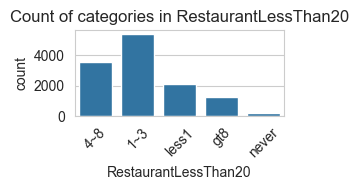

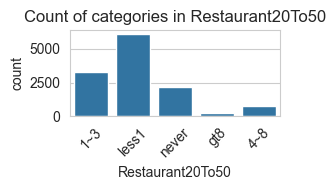

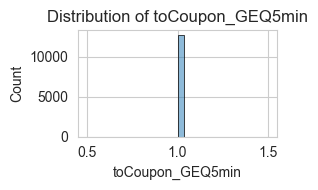

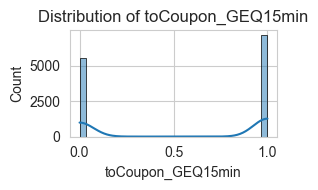

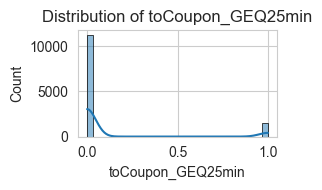

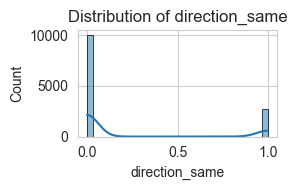

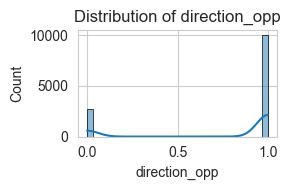

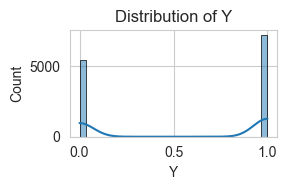

In [173]:
for col in X.columns:
    plt.figure(figsize=(3,2))
    if pd.api.types.is_numeric_dtype(X[col]):
        sns.histplot(X[col], bins=30, kde=True, edgecolor='black')
        plt.title(f'Distribution of {col}')
    else:
        sns.countplot(x=X[col])
        plt.title(f'Count of categories in {col}')
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


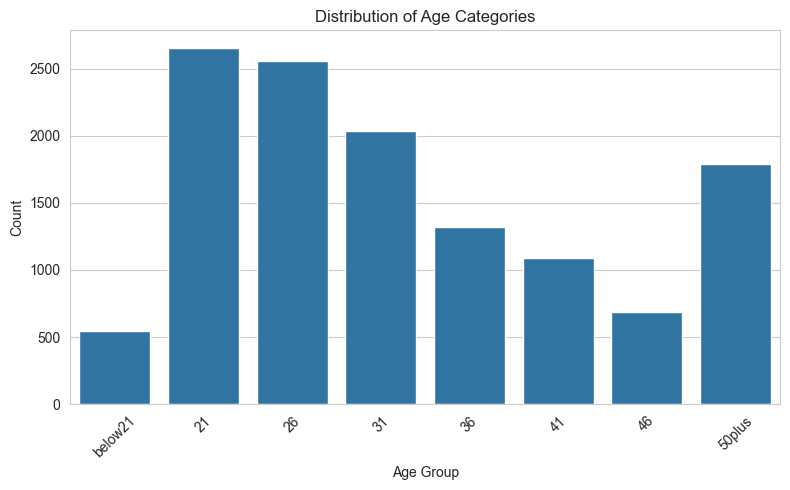

In [198]:
# Define order for age
age_order = ['below21', '21', '26', '31', '36', '41', '46', '50plus']

# Convert age to an ordered categorical
X['age'] = pd.Categorical(X['age'], categories=age_order, ordered=True)

# Plot age distribution
plt.figure(figsize=(8, 5))
sns.countplot(x='age', data=X, order=age_order)
plt.title('Distribution of Age Categories')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


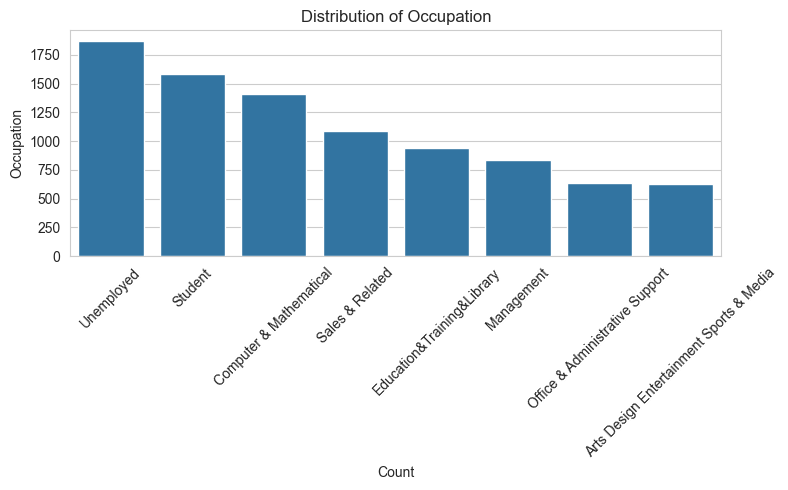

<Figure size 640x480 with 0 Axes>

In [204]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of occupation (many categories → vertical display)
plt.figure(figsize=(8, 5))
sns.countplot(x=X['occupation'], order=X['occupation'].value_counts().index[:8]) #Only 8 so that they fit in Latex
plt.title('Distribution of Occupation')
plt.xlabel('Count')
plt.ylabel('Occupation')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.tight_layout()
plt.show()


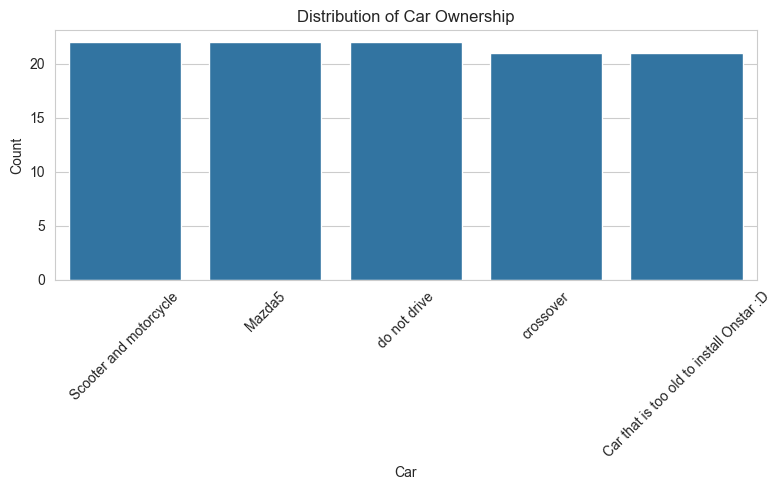

In [187]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot distribution of car
plt.figure(figsize=(8, 5))
sns.countplot(x=X['car'], order=X['car'].value_counts().index)
plt.title('Distribution of Car Ownership')
plt.xlabel('Car')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


PREPROCCESING STEPS

car                     12576
CoffeeHouse               217
Restaurant20To50          189
CarryAway                 151
RestaurantLessThan20      130
Bar                       107
dtype: int64


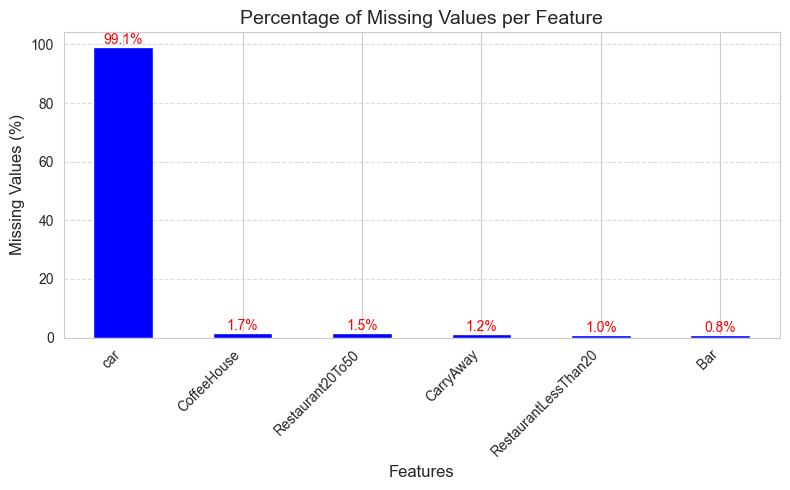

In [205]:
#Missing Values
#Identify missing values and show them in a graphic
#based on that graphic we deside what to do with the columns, e.g drop the NA or drop the whole column instead
# 1. Calculate percentage of missing values for each column
missing_percent = X.isnull().mean() * 100                  ##TODO. Use the missing_percent variable in the step below, so it is not neccesary to name them all manually, and the graph
missing_percent = missing_percent[missing_percent > 0].sort_values(ascending=False)

#TODO Sollen wir hier die Grafik nehmen oder reicht der kleine print aus??
missing_values = X.isnull().sum()[X.isnull().sum() > 0].sort_values(ascending=False)
print(missing_values)

# 2. Create the bar chart
plt.figure(figsize=(8, 5))
ax = missing_percent.plot(kind='bar', color='blue')

# 3. Add labels and title
plt.title('Percentage of Missing Values per Feature', fontsize=14)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Missing Values (%)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# use of container
for container in ax.containers:
    ax.bar_label(container, fmt='%.1f%%', label_type='edge', color='red')

plt.tight_layout()
plt.show()